# Cleaning Fortune 500 list

In [1]:
#dependencies
import pandas as pd
import csv
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from config import g_key
import geocoder
import string

In [2]:
#importing fortune 500 HQs
fortune500HQ_to_load = "./Data_Files/Fortune_500.csv"
Fortune_500 = pd.read_csv(fortune500HQ_to_load)

#Fortune_500.head()

In [3]:
counties = []

for row in range(0, len(Fortune_500)):
    city = Fortune_500["Hqcity"][row]
    state = Fortune_500["Hqstate"][row]
    results = geocoder.google(f"{city}, {state}", key=g_key)

   # Use conditional to set county equal to city name if no county is available
    if type(results.county) != str:
        counties.append(f"{city} County ({state})")
        #counties.append("New York County (NY)")
    elif results.county == "Queens County":
        counties.append("New York County (NY)")
    elif results.county == "New York":
        counties.append("New York County (NY)")
    elif results.county == "District of Columbia":
        counties.append("District of Columbia (DC)")
    elif results.county == "St Louis County":
        counties.append("St. Louis County (MO)")
    elif results.county == "Dupage County":
        counties.append("DuPage County (IL)")
    elif results.county == "Falls Church County":
        counties.append("Falls Church city (VA)")
    elif results.county == "Chesapeake County":
        counties.append("Chesapeake city (VA)")
    elif results.county == "Norfolk County":
        counties.append("Norfolk city (VA)")
    elif results.county == "Newport News County":
        counties.append("Newport News city (VA)")
    else:
        counties.append(f"{results.county} ({state})")
        

# Add County Column
Fortune_500["County"] = counties
Fortune_500.head()

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,County
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,"702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0,Benton County (AR)
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0,Douglas County (NE)
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,...,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0,Santa Clara County (CA)
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,...,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0,Dallas County (TX)
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,...,"1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0,San Francisco County (CA)


In [5]:
# Create empty list to store zip codes
zip_codes = []

# Loop through dataframe, splitting Address column into strings extracting zip at final index
for row in range(0, len(Fortune_500)):
    address_split = Fortune_500["Address"][row].split()
    zip_codes.append(address_split[-1])
    
# Add zip code column
Fortune_500["Zip Code"] = zip_codes

In [6]:
# Remove unnecessary columns
Fortune_500 = Fortune_500[["Rank", "Title", "Sector", "Industry", "Hqcity", "Hqstate", "County", "Zip Code", "Revenues", "Profits", "Prftchange"]]

# Rename columns
Fortune_500 = Fortune_500.rename(index=str, columns={"Hqcity": "City", "Hqstate": "State", "Prftchange": "Change in Profits"})

In [7]:
#Fortune_500.loc[Fortune_500["State"] == "NY"]
#Fortune_500
Fortune_500.iloc[13,6]

'New York County (NY)'

# Poverty - Roa

In [8]:
#import and read poverty csv
poverty_to_load = "./Data_Files/poverty.csv"
poverty_df = pd.read_csv(poverty_to_load)

#print head
poverty_df.head()



,Year,State,County ID,State / County Name,All Ages SAIPE Poverty Universe,All Ages in Poverty Count,All Ages in Poverty Count LB 90%,All Ages in Poverty Count UB 90%,90% Confidence Interval (All Ages in Poverty Count),All Ages in Poverty Percent,...,Under Age 5 in Poverty Count UB 90%,90% Confidence Interval (Under Age 5 in Poverty Count),Under Age 5 in Poverty Percent,Under Age 5 in Poverty Percent LB 90%,Under Age 5 in Poverty Percent UB 90%,90% Confidence Interval (Under Age 5 in Poverty Percent),Median Household Income in Dollars,Median Household Income in Dollars LB 90%,Median Household Income in Dollars UB 90%,90% Confidence Interval (Median Household Income in Dollars)
0,2017,0,0,United States,"317,741,588","42,583,651","42,342,619","42,824,683","42,342,619 to 42,824,683",13.4,...,"3,985,293","3,880,645 to 3,985,293",20.2,19.9,20.5,19.9 to 20.5,"$60,336","$60,250","$60,422","$60,250 to $60,422"
1,2017,1,1000,Alabama,"4,752,519","802,263","784,517","820,009","784,517 to 820,009",16.9,...,"82,963","75,009 to 82,963",27.7,26.3,29.1,26.3 to 29.1,"$48,193","$47,451","$48,935","$47,451 to $48,935"
2,2017,1,1001,Autauga County (AL),"55,021","7,390","6,147","8,633","6,147 to 8,633",13.4,...,NaN,NaN,NaN,NaN,NaN,NaN,"$58,343","$52,121","$64,565","$52,121 to $64,565"
3,2017,1,1003,Baldwin County (AL),"209,922","21,199","17,444","24,954","17,444 to 24,954",10.1,...,NaN,NaN,NaN,NaN,NaN,NaN,"$56,607","$52,439","$60,775","$52,439 to $60,775"
4,2017,1,1005,Barbour County (AL),"22,224","7,414","6,325","8,503","6,325 to 8,503",33.4,...,NaN,NaN,NaN,NaN,NaN,NaN,"$32,490","$29,218","$35,762","$29,218 to $35,762"


In [9]:
#rename column to county in order to merge    
poverty_df["County"] = poverty_df["State / County Name"]

#renaming independent cities in virginia to counties in order to fully merge
poverty_df["County"] = poverty_df["County"].replace("Falls Church city (VA)", "Falls Church County (VA)")
poverty_df["County"] = poverty_df["County"].replace("Chesapeake city (VA)", "Chesapeake County (VA)") 
poverty_df["County"] = poverty_df["County"].replace("Norfolk city (VA)", "Norfolk County (VA)")
poverty_df["County"] = poverty_df["County"].replace("Newport News city (VA)", "Newport News County (VA)")
#add county column
#poverty_df.head()


In [14]:
#clean up DF to only columns needed
poverty_df = poverty_df[["Year", "County", "All Ages in Poverty Count", "All Ages in Poverty Percent", "Median Household Income in Dollars"]]

#removing blank spaces at the end of the county for poverty df
poverty_df["County"]= poverty_df["County"].replace(r' $','',regex=True)

#drop NaNs - I have already checked that the data I need for merged DF doesnt have nan - make it into a new df
poverty_df_drop = poverty_df.dropna()

poverty_df.head()

,Year,County,All Ages in Poverty Count,All Ages in Poverty Percent,Median Household Income in Dollars
0,2017,United States,"42,583,651",13.4,60336
1,2017,Alabama,"802,263",16.9,48193
2,2017,Autauga County (AL),"7,390",13.4,58343
3,2017,Baldwin County (AL),"21,199",10.1,56607
4,2017,Barbour County (AL),"7,414",33.4,32490


In [15]:
#removing symbols from median household income using regex
poverty_df["Median Household Income in Dollars"]= poverty_df["Median Household Income in Dollars"].replace(r'[\$ ,]','',regex=True)
poverty_df.head()


,Year,County,All Ages in Poverty Count,All Ages in Poverty Percent,Median Household Income in Dollars
0,2017,United States,"42,583,651",13.4,60336
1,2017,Alabama,"802,263",16.9,48193
2,2017,Autauga County (AL),"7,390",13.4,58343
3,2017,Baldwin County (AL),"21,199",10.1,56607
4,2017,Barbour County (AL),"7,414",33.4,32490


In [16]:
poverty_df_drop["Median Household Income in Dollars"]= poverty_df_drop["Median Household Income in Dollars"].astype(int)
poverty_df_drop["All Ages in Poverty Percent"]= poverty_df_drop["All Ages in Poverty Percent"].astype(int)    
poverty_df_drop.dtypes    

/anaconda3/envs/PythonData2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/PythonData2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Year                                   int64
County                                object
All Ages in Poverty Count             object
All Ages in Poverty Percent            int64
Median Household Income in Dollars     int64
dtype: object

In [17]:
# merge dataframes 
poverty_500_df = pd.merge(Fortune_500, poverty_df, on="County", how="inner")

#print merged df
poverty_500_df

#poverty_500_df.loc[poverty_500_df["State"] == "MO"]
#poverty_500_df.loc[poverty_500_df["Year"].isnull()]

,Rank,Title,Sector,Industry,City,State,County,Zip Code,Revenues,Profits,Change in Profits,Year,All Ages in Poverty Count,All Ages in Poverty Percent,Median Household Income in Dollars
0,1,Walmart,Retailing,General Merchandisers,Bentonville,AR,Benton County (AR),72716,485873,13643.0,-7.2,2017,"24,110",9.1,64728
1,407,J.B. Hunt Transport Services,Transportation,"Trucking, Truck Leasing",Lowell,AR,Benton County (AR),72745,6556,432.1,1.1,2017,"24,110",9.1,64728
2,2,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),Omaha,NE,Douglas County (NE),68131,223604,24074.0,0,2017,"62,619",11.4,61706
3,143,Union Pacific,Transportation,Railroads,Omaha,NE,Douglas County (NE),68179,19941,4233.0,-11.3,2017,"62,619",11.4,61706
4,324,Peter Kiewit Sons’,Engineering & Construction,"Engineering, Construction",Omaha,NE,Douglas County (NE),68131,8573,396.0,57.8,2017,"62,619",11.4,61706
5,342,Mutual of Omaha Insurance,Financials,"Insurance: Life, Health (Stock)",Omaha,NE,Douglas County (NE),68175,7899,356.6,7.1,2017,"62,619",11.4,61706
6,3,Apple,Technology,"Computers, Office Equipment",Cupertino,CA,Santa Clara County (CA),95014,215639,45687.0,-14.4,2017,"142,603",7.5,118468
7,27,Alphabet,Technology,Internet Services and Retailing,Mountain View,CA,Santa Clara County (CA),94043,90272,19478.0,19.1,2017,"142,603",7.5,118468
8,47,Intel,Technology,Semiconductors and Other Electronic Components,Santa Clara,CA,Santa Clara County (CA),95054,59387,10316.0,-9.7,2017,"142,603",7.5,118468
9,59,Hewlett Packard Enterprise,Technology,Information Technology Services,Palo Alto,CA,Santa Clara County (CA),94304,50123,3161.0,73.3,2017,"142,603",7.5,118468


In [18]:
#turn median household income to a float using regular expression
poverty_500_df["Median Household Income in Dollars"]= poverty_500_df["Median Household Income in Dollars"].replace(r'[\$ ,]','',regex=True)
poverty_500_df["All Ages in Poverty Count"]= poverty_500_df["All Ages in Poverty Count"].replace(r'[ ,]','',regex=True)    

poverty_500_df.head()
#poverty_500_df.tail()

,Rank,Title,Sector,Industry,City,State,County,Zip Code,Revenues,Profits,Change in Profits,Year,All Ages in Poverty Count,All Ages in Poverty Percent,Median Household Income in Dollars
0,1,Walmart,Retailing,General Merchandisers,Bentonville,AR,Benton County (AR),72716,485873,13643.0,-7.2,2017,24110,9.1,64728
1,407,J.B. Hunt Transport Services,Transportation,"Trucking, Truck Leasing",Lowell,AR,Benton County (AR),72745,6556,432.1,1.1,2017,24110,9.1,64728
2,2,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),Omaha,NE,Douglas County (NE),68131,223604,24074.0,0,2017,62619,11.4,61706
3,143,Union Pacific,Transportation,Railroads,Omaha,NE,Douglas County (NE),68179,19941,4233.0,-11.3,2017,62619,11.4,61706
4,324,Peter Kiewit Sons’,Engineering & Construction,"Engineering, Construction",Omaha,NE,Douglas County (NE),68131,8573,396.0,57.8,2017,62619,11.4,61706


In [19]:

#turn median household income into integers in order to sum etc
poverty_500_df["Median Household Income in Dollars"] = poverty_500_df["Median Household Income in Dollars"].astype(int)
poverty_500_df["All Ages in Poverty Percent"] = poverty_500_df["All Ages in Poverty Percent"].astype(int)
poverty_500_df["Profits"] = poverty_500_df["Profits"].astype(int)
poverty_500_df["All Ages in Poverty Count"]= poverty_500_df["All Ages in Poverty Count"].astype(int)
#check Dtypes to make sure it worked
poverty_500_df.dtypes



Rank                                   int64
Title                                 object
Sector                                object
Industry                              object
City                                  object
State                                 object
County                                object
Zip Code                              object
Revenues                               int64
Profits                                int64
Change in Profits                     object
Year                                   int64
All Ages in Poverty Count              int64
All Ages in Poverty Percent            int64
Median Household Income in Dollars     int64
dtype: object

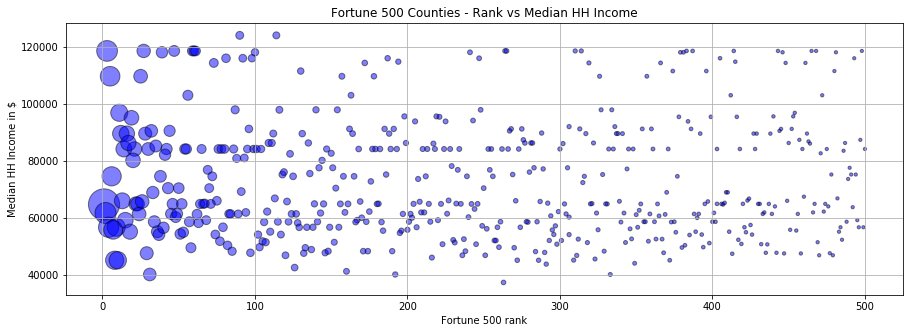

In [67]:
# Build the scatter plot for profits and household income 
plt.scatter(poverty_500_df["Rank"], poverty_500_df["Median Household Income in Dollars"], marker="o", facecolors="blue", edgecolors="black", 
            s=poverty_500_df["Revenues"]*.002, alpha=.5)

#add scatter plot elements and titles
plt.title("Fortune 500 Counties - Rank vs Median HH Income")
plt.xlabel("Fortune 500 rank")
plt.ylabel("Median HH Income in $")
plt.grid()

#make graph big
#plt.rcParams["figure.figsize"] = (15,5)

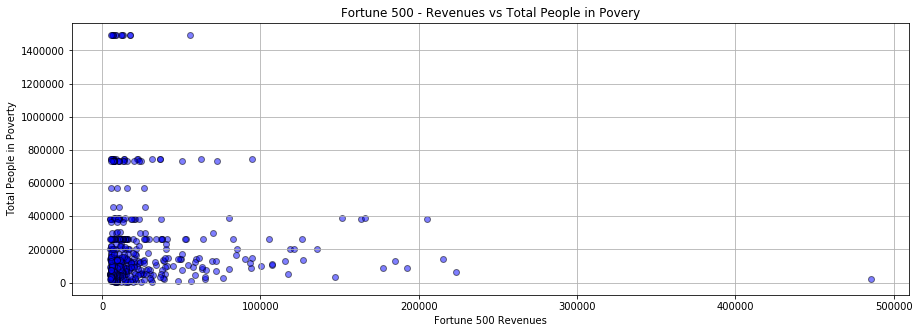

In [40]:
# Build the scatter plot for profits and poverty
plt.scatter(poverty_500_df["Revenues"], poverty_500_df["All Ages in Poverty Count"], marker="o", facecolors="blue", edgecolors="black", alpha=.5)

#add scatter plot elements and titles
plt.title("Fortune 500 - Revenues vs Total People in Povery")
plt.xlabel("Fortune 500 Revenues")
plt.ylabel("Total People in Poverty")
plt.grid()

Text(0, 0.5, 'Average HH Income')

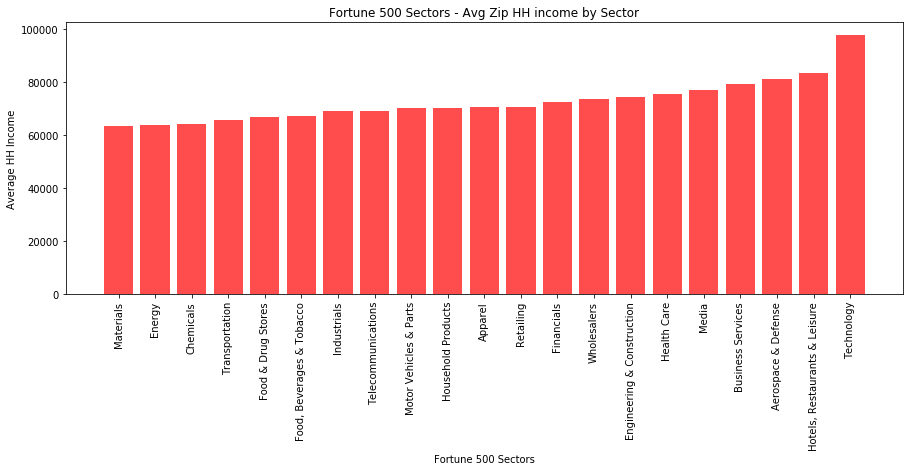

In [49]:
#build bar chart by sector
#do groupby sector to plot a bar graph
sector_group = poverty_500_df.groupby(['Sector'])

#groupby into dataframe
sector_group2 = pd.DataFrame(sector_group["Median Household Income in Dollars"].mean())

#reset index
sector_reindex = sector_group2.reset_index()

sector_reindex2 = sector_reindex.sort_values(by=["Median Household Income in Dollars"])
#build x axis
sector = np.arange(0,21)


#build bar graph
plt.bar(sector,sector_reindex2["Median Household Income in Dollars"], color='r', alpha=0.7)

#plot tick labels
plt.xticks(sector, sector_reindex2["Sector"], rotation = "vertical")

#add scatter plot elements and titles
plt.title("Fortune 500 Sectors - Avg Zip HH income by Sector")
plt.xlabel("Fortune 500 Sectors")
plt.ylabel("Average HH Income")


In [48]:
sector_reindex.sort_values(by=["Median Household Income in Dollars"])

,Sector,Median Household Income in Dollars
13,Materials,63419.315789
4,Energy,63585.526316
3,Chemicals,64125.571429
19,Transportation,65631.647059
7,Food & Drug Stores,66827.428571
8,"Food, Beverages & Tobacco",67129.791667
12,Industrials,68859.105263
18,Telecommunications,69022.300000
15,Motor Vehicles & Parts,70093.444444
11,Household Products,70284.166667


In [50]:
#merge on right then drop fortune 500 counties
non_500_df = pd.merge(Fortune_500, poverty_df_drop, on="County", how="right")

#get nulls for profits which returns all non-500 counties
non_500_df = non_500_df[pd.isnull(non_500_df['Profits'])]

#reconstruct df to keep only series with values
non_500_df = non_500_df[["County", "Year", "All Ages in Poverty Count", "All Ages in Poverty Percent", "Median Household Income in Dollars"]]

#non_500_df[non_500_df['County'] != '()']
#take random sample
#non_500_df.sample(n=500, random_state=1)
non_500_list = non_500_df.sample(n=500, random_state=0)

avg_non_500_HH = non_500_list["Median Household Income in Dollars"].mean()

F500_avg_HH = poverty_500_df["Median Household Income in Dollars"].mean()

print(f' the average HH income for F500 zips is {F500_avg_HH} otherwise its {avg_non_500_HH} ')

non_500_df

 the average HH income for F500 zips is 73110.79 otherwise its 51134.194 


,County,Year,All Ages in Poverty Count,All Ages in Poverty Percent,Median Household Income in Dollars
500,United States,2017,"42,583,651",13,60336
501,Alabama,2017,"802,263",16,48193
502,Autauga County (AL),2017,"7,390",13,58343
503,Baldwin County (AL),2017,"21,199",10,56607
504,Barbour County (AL),2017,"7,414",33,32490
505,Bibb County (AL),2017,"4,137",20,45795
506,Blount County (AL),2017,"7,343",12,48253
507,Bullock County (AL),2017,"2,956",34,29113
508,Butler County (AL),2017,"4,154",21,36842
509,Calhoun County (AL),2017,"19,832",17,45937


In [64]:
data = {"Counties": ["Fortune 500", "Non Fortune 500"], "Median HH incomes": [F500_avg_HH, avg_non_500_HH]}

bar_df =pd.DataFrame(data)

bar_df

,Counties,Median HH incomes
0,Fortune 500,73110.790
1,Non Fortune 500,51134.194


Text(0, 0.5, 'Average Median HH Income')

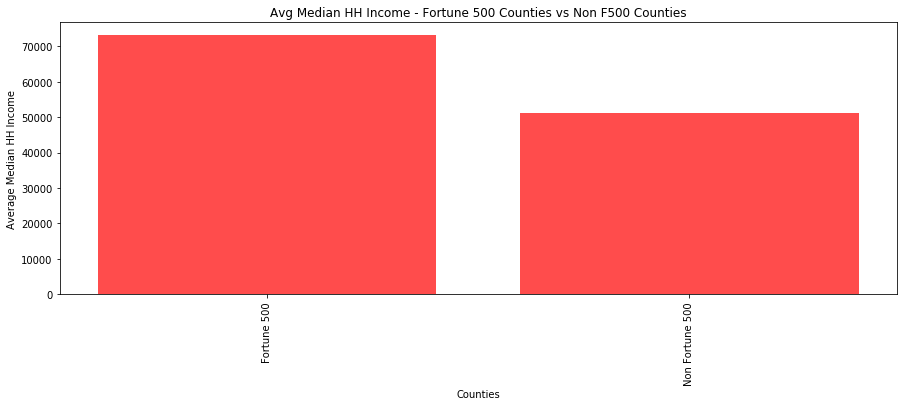

In [66]:
#build x axis
x_axis = np.arange(0,2, 1)
y_axis = np.arange(0,100000)

#build bar graph
plt.bar(x_axis,bar_df["Median HH incomes"], color='r', alpha=0.7)
plt.xticks(x_axis, bar_df["Counties"], rotation = "vertical")

#add scatter plot elements and titles
plt.title("Avg Median HH Income - Fortune 500 Counties vs Non F500 Counties")
plt.xlabel("Counties")
plt.ylabel("Average Median HH Income")